# **Who survived Titanic?**

This time, I will analyze the film and the most shocking incident that many people remember, namely Titanic.

**The RMS Titanic** was a British passenger liner operated by the White Star Line, which unfortunately sank in the North Atlantic Ocean on April 15, 1912. This incident was even remade into a film led by James Cameron and published on January 5, 1998. It tells about seventeen-year-old Rose hails from an aristocratic family and is set to be married. But when she boards the Titanic, she meets Jack Dawson, an artist, and falls in love. Despite how beautiful and emotional this film is and accompanied by a tragic romantic story, it demonstrates nature’s terrifying and mystical power, **killing more than 1500 people: 832 passengers and 685 crew members.**  

And the analysis this time, I will analyze the passengers of the titanic only and not the crew members.
The questions that will be the main topics are:  

**Who died?**
* Women or men, who have a higher mortality rate? And why?
* Which class has the higher mortality rate? And why?
* Does traveling alone have a higher mortality rate? And why?
* Does the origin of departure have any effect on mortality rates? And why?
* Does age affect the mortality rate? And why?
* Does the position you have affect the death rate? And why?



# Import Library

In [1]:
import pandas as pd
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from operator import attrgetter


# The data i will use is **titanic.csv** from https://data.world/nrippner/titanic-disaster-dataset

In [2]:
df=pd.read_csv("titanic remake.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


To simplify the relationship between Sibsp and Parch, I will merge them into the ‘status’ column  

**Condition:**
* If there is at least one sibsp / parch, it means he is **not traveling alone**
* and vice versa. If there is no sibsp / parch at all, it means he is **traveling alone**


In [3]:
df['status']=(df['sibsp']+df['parch']).apply(lambda x:'alone' if x==0 else 'not alone')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,status
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",alone
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",not alone
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",not alone
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",not alone
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",not alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,not alone
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,alone
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,alone
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,alone


**pclass**: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

**Survived**:  
0= Not survived  
1= Survived

**Name**:  
Lastname, Title, Firstname

**Sex**:  Gender

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

**sibsp**: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**parch**: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

**Ticket**:  
Ticket number

**Fare**:  
Passanger Fare

**Cabin**:  
Cabin Code

**embarked**: Port of Embarkation  
C = Cherbourg, Q = Queenstown, S = Southampton

**boat** - Lifeboat (if survived)  
**body** - Body number (if did not survive and body was recovered)
**Status** : Passengers status, Alone, or Not alone (go with sibsp / parch)

# **1. Sort the columns and analyze the shape**

In [4]:
df=df[['pclass','name','sex','age','sibsp','parch','status','ticket','cabin','fare','embarked','home.dest','boat','survived','body']]
df.head()

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,alone,24160,B5,211.3375,S,"St Louis, MO",2,1.0,NaN
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",11,1.0,NaN
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",NaN,0.0,NaN
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",NaN,0.0,135.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",NaN,0.0,NaN


In [5]:
df.shape
#1310 rows, 14 columns

(1310, 15)

# **2.Finding The Unique Values**

In [6]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [7]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'survived','pclass', 'sex','sibsp','parch','embarked'}}
multi_table([df_nunique['survived'].style.background_gradient(cmap='summer'),df_nunique['sibsp'].style.background_gradient(cmap='summer'),df_nunique['parch'].style.background_gradient(cmap='summer'),df_nunique['embarked'].style.background_gradient(cmap='summer')])

,survived
0.0,809
1.0,500
,sibsp
0.0,891
1.0,319
2.0,42
4.0,22
3.0,20
8.0,9
5.0,6


# **3.Handle Missing value**

In [8]:
df.isna().sum()

pclass          1
name            1
sex             1
age           264
sibsp           1
parch           1
status          0
ticket          1
cabin        1015
fare            2
embarked        3
home.dest     565
boat          824
survived        1
body         1189
dtype: int64

## **3.1** Checking data with the highest missing value = body

In [9]:
df[df['body'].isna()==True]

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,alone,24160,B5,211.3375,S,"St Louis, MO",2,1.0,NaN
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",11,1.0,NaN
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",NaN,0.0,NaN
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",NaN,0.0,NaN
5,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,alone,19952,E12,26.5500,S,"New York, NY",3,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,alone,2627,NaN,14.4583,C,NaN,NaN,0.0,NaN
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,NaN,0.0,NaN
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,alone,2670,NaN,7.2250,C,NaN,NaN,0.0,NaN
1308,3.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,alone,315082,NaN,7.8750,S,NaN,NaN,0.0,NaN


### Body that not found will go with **0**

In [10]:
df['body']=df['body'].fillna(0)

## **3.2** Checking data with the 2nd highest missing value = cabin

In [11]:
df[df['cabin'].isna()==True]

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body
9,1.0,"Artagaveytia, Mr. Ramon",male,71.0,0.0,0.0,alone,PC 17609,NaN,49.5042,C,"Montevideo, Uruguay",NaN,0.0,22.0
13,1.0,"Barber, Miss. Ellen ""Nellie""",female,26.0,0.0,0.0,alone,19877,NaN,78.8500,S,NaN,6,1.0,0.0
15,1.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,alone,PC 17318,NaN,25.9250,S,"New York, NY",NaN,0.0,0.0
23,1.0,"Bidois, Miss. Rosalie",female,42.0,0.0,0.0,alone,PC 17757,NaN,227.5250,C,NaN,4,1.0,0.0
25,1.0,"Birnbaum, Mr. Jakob",male,25.0,0.0,0.0,alone,13905,NaN,26.0000,C,"San Francisco, CA",NaN,0.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,NaN,0.0,0.0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,alone,2656,NaN,7.2250,C,NaN,NaN,0.0,304.0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,alone,2670,NaN,7.2250,C,NaN,NaN,0.0,0.0
1308,3.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,alone,315082,NaN,7.8750,S,NaN,NaN,0.0,0.0


### there is no way to fill in the missing cabin number, it will be left for now

## **3.3** Checking data with the 3rd highest missing value = Boat

In [12]:
df[df['boat'].isna()==True]

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body
2,1.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",NaN,0.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",NaN,0.0,135.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",NaN,0.0,0.0
7,1.0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,alone,112050,A36,0.0000,S,"Belfast, NI",NaN,0.0,0.0
9,1.0,"Artagaveytia, Mr. Ramon",male,71.0,0.0,0.0,alone,PC 17609,NaN,49.5042,C,"Montevideo, Uruguay",NaN,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,NaN,0.0,0.0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,alone,2656,NaN,7.2250,C,NaN,NaN,0.0,304.0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,alone,2670,NaN,7.2250,C,NaN,NaN,0.0,0.0
1308,3.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,alone,315082,NaN,7.8750,S,NaN,NaN,0.0,0.0


### Passenger that did not took a boat will go to 0

In [13]:
df['boat']=df['boat'].fillna(0)

## **3.4** Checking data with the 4th highest missing value = home.dest

In [14]:
df[df['home.dest'].isna()==True]

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body
13,1.0,"Barber, Miss. Ellen ""Nellie""",female,26.0,0.0,0.0,alone,19877,NaN,78.8500,S,NaN,6,1.0,0.0
18,1.0,"Bazzani, Miss. Albina",female,32.0,0.0,0.0,alone,11813,D15,76.2917,C,NaN,8,1.0,0.0
23,1.0,"Bidois, Miss. Rosalie",female,42.0,0.0,0.0,alone,PC 17757,NaN,227.5250,C,NaN,4,1.0,0.0
24,1.0,"Bird, Miss. Ellen",female,29.0,0.0,0.0,alone,PC 17483,C97,221.7792,S,NaN,8,1.0,0.0
28,1.0,"Bissette, Miss. Amelia",female,35.0,0.0,0.0,alone,PC 17760,C99,135.6333,S,NaN,8,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,0,0.0,0.0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,alone,2656,NaN,7.2250,C,NaN,0,0.0,304.0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,alone,2670,NaN,7.2250,C,NaN,0,0.0,0.0
1308,3.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,alone,315082,NaN,7.8750,S,NaN,0,0.0,0.0


### **3.4.1** little be tricky, can be adjusted with the same ticket that have home.dest

In [15]:
df.sort_values(by='ticket').head(20)

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body
67,1.0,"Cherry, Miss. Gladys",female,30.0,0.0,0.0,alone,110152,B77,86.5000,S,"London, England",8,1.0,0.0
245,1.0,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0.0,0.0,alone,110152,B77,86.5000,S,"London Vancouver, BC",8,1.0,0.0
195,1.0,"Maioni, Miss. Roberta",female,16.0,0.0,0.0,alone,110152,B79,86.5000,S,NaN,8,1.0,0.0
289,1.0,"Taussig, Miss. Ruth",female,18.0,0.0,2.0,not alone,110413,E68,79.6500,S,"New York, NY",8,1.0,0.0
291,1.0,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1.0,1.0,not alone,110413,E67,79.6500,S,"New York, NY",8,1.0,0.0
290,1.0,"Taussig, Mr. Emil",male,52.0,1.0,1.0,not alone,110413,E67,79.6500,S,"New York, NY",0,0.0,0.0
232,1.0,"Porter, Mr. Walter Chamberlain",male,47.0,0.0,0.0,alone,110465,C110,52.0000,S,"Worcester, MA",0,0.0,207.0
74,1.0,"Clifford, Mr. George Quincy",male,NaN,0.0,0.0,alone,110465,A14,52.0000,S,"Stoughton, MA",0,0.0,0.0
194,1.0,"Maguire, Mr. John Edward",male,30.0,0.0,0.0,alone,110469,C106,26.0000,S,"Brockton, MA",0,0.0,0.0
34,1.0,"Borebank, Mr. John James",male,42.0,0.0,0.0,alone,110489,D22,26.5500,S,"London / Winnipeg, MB",0,0.0,0.0


### But the fact is, there are 2 possibilities 
* 1st. Same home, different destination
* 2nd. different home, same destination

### For now, im gonna leave it to missing Value

## **3.5** Checking data with the 5th highest missing value = age

## This time, before I took any conclusion, im gonna fill the missing value based on the Title
### **3.5.1** to do that, first i need to split the name so we can took the middle part, which is the title

In [16]:
df['lastname']=df['name'].str.split(',',expand=True)[0]
df

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body,lastname
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,alone,24160,B5,211.3375,S,"St Louis, MO",2,1.0,0.0,Allen
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",11,1.0,0.0,Allison
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,0.0,Allison
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,135.0,Allison
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,0.0,Allison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,0,0.0,0.0,Zabour
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,alone,2656,NaN,7.2250,C,NaN,0,0.0,304.0,Zakarian
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,alone,2670,NaN,7.2250,C,NaN,0,0.0,0.0,Zakarian
1308,3.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,alone,315082,NaN,7.8750,S,NaN,0,0.0,0.0,Zimmerman


In [17]:
df['firstname']=df['name'].str.split(',',expand=True)[1]
df

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body,lastname,firstname
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,alone,24160,B5,211.3375,S,"St Louis, MO",2,1.0,0.0,Allen,Miss. Elisabeth Walton
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",11,1.0,0.0,Allison,Master. Hudson Trevor
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,0.0,Allison,Miss. Helen Loraine
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,135.0,Allison,Mr. Hudson Joshua Creighton
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,0.0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,0,0.0,0.0,Zabour,Miss. Thamine
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,alone,2656,NaN,7.2250,C,NaN,0,0.0,304.0,Zakarian,Mr. Mapriededer
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,alone,2670,NaN,7.2250,C,NaN,0,0.0,0.0,Zakarian,Mr. Ortin
1308,3.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,alone,315082,NaN,7.8750,S,NaN,0,0.0,0.0,Zimmerman,Mr. Leo


In [18]:
df['title']=df['firstname'].str.split('.',expand=True)[0]

In [19]:
df=df.drop(columns=['lastname','firstname'])

In [20]:
df

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body,title
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,alone,24160,B5,211.3375,S,"St Louis, MO",2,1.0,0.0,Miss
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",11,1.0,0.0,Master
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,0.0,Miss
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,135.0,Mr
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,not alone,113781,C22 C26,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0.0,0.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,0,0.0,0.0,Miss
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,alone,2656,NaN,7.2250,C,NaN,0,0.0,304.0,Mr
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,alone,2670,NaN,7.2250,C,NaN,0,0.0,0.0,Mr
1308,3.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,alone,315082,NaN,7.8750,S,NaN,0,0.0,0.0,Mr


###  called title has been made, contains title of each passanger
### **3.5.2** Lets fill the missing value based on passanger's average age by sex and title

In [21]:
kukukaka=df[df['age'].isna()==True].index

In [22]:
df.loc[kukukaka]

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body,title
15,1.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,alone,PC 17318,NaN,25.9250,S,"New York, NY",0,0.0,0.0,Mr
37,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,alone,111427,NaN,26.5500,S,"Los Angeles, CA",9,1.0,0.0,Mr
40,1.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,alone,112379,NaN,39.6000,C,"Philadelphia, PA",0,0.0,0.0,Dr
46,1.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,alone,113798,NaN,31.0000,S,NaN,0,0.0,0.0,Mr
59,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,alone,17770,NaN,27.7208,C,"New York, NY",5,1.0,0.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,alone,A/4. 34244,NaN,7.2500,S,NaN,0,0.0,0.0,Mr
1302,3.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,alone,2647,NaN,7.2250,C,NaN,0,0.0,0.0,Mr
1303,3.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,alone,2627,NaN,14.4583,C,NaN,0,0.0,0.0,Mr
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,0,0.0,0.0,Miss


In [23]:
df['age']=round(df.groupby(['sex','title'])['age'].apply(lambda x: x.fillna(x.mean())))

In [24]:
df.loc[kukukaka]

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body,title
15,1.0,"Baumann, Mr. John D",male,32.0,0.0,0.0,alone,PC 17318,NaN,25.9250,S,"New York, NY",0,0.0,0.0,Mr
37,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,32.0,0.0,0.0,alone,111427,NaN,26.5500,S,"Los Angeles, CA",9,1.0,0.0,Mr
40,1.0,"Brewe, Dr. Arthur Jackson",male,43.0,0.0,0.0,alone,112379,NaN,39.6000,C,"Philadelphia, PA",0,0.0,0.0,Dr
46,1.0,"Cairns, Mr. Alexander",male,32.0,0.0,0.0,alone,113798,NaN,31.0000,S,NaN,0,0.0,0.0,Mr
59,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,37.0,0.0,0.0,alone,17770,NaN,27.7208,C,"New York, NY",5,1.0,0.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3.0,"Wiseman, Mr. Phillippe",male,32.0,0.0,0.0,alone,A/4. 34244,NaN,7.2500,S,NaN,0,0.0,0.0,Mr
1302,3.0,"Yousif, Mr. Wazli",male,32.0,0.0,0.0,alone,2647,NaN,7.2250,C,NaN,0,0.0,0.0,Mr
1303,3.0,"Yousseff, Mr. Gerious",male,32.0,0.0,0.0,alone,2627,NaN,14.4583,C,NaN,0,0.0,0.0,Mr
1305,3.0,"Zabour, Miss. Thamine",female,22.0,1.0,0.0,not alone,2665,NaN,14.4542,C,NaN,0,0.0,0.0,Miss


### **missing value in age is done**

## **3.6** checking missing value with the total of 1

In [25]:
# Checking one of the data that have missing value in the column pclass
df[df['pclass'].isna()==True]

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body,title
1309,NaN,NaN,NaN,NaN,NaN,NaN,not alone,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN


### **3.6.1** all columns in index 1309 has no data, so it is suitable to be dropped or deleted

In [26]:
df=df.drop(1309)

## **3.7** Manage missing value in column fare with replace it by the avarage fare of each Pclasss

In [27]:
# Checking one of the data that have missing value in the column fare
df[df['fare'].isna()==True]

,pclass,name,sex,age,sibsp,parch,status,ticket,cabin,fare,embarked,home.dest,boat,survived,body,title
1225,3.0,"Storey, Mr. Thomas",male,60.0,0.0,0.0,alone,3701,NaN,NaN,S,NaN,0,0.0,261.0,Mr


In [28]:
df['fare']=df.groupby('pclass')['fare'].apply(lambda x: x.fillna(x.mean()))

# **4.** Now, all the missing values are fixed, lets try to analyze further

In [29]:
round(df.describe(exclude = 'object'), 2)

,pclass,age,sibsp,parch,fare,survived,body
count,1309.00,1309.00,1309.00,1309.00,1309.00,1309.00,1309.00
mean,2.29,29.86,0.50,0.39,33.28,0.38,14.86
std,0.84,13.19,1.04,0.87,51.74,0.49,55.20
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,22.00,0.00,0.00,7.90,0.00,0.00
50%,3.00,30.00,0.00,0.00,14.45,0.00,0.00
75%,3.00,36.00,1.00,0.00,31.28,1.00,0.00
max,3.00,80.00,8.00,9.00,512.33,1.00,328.00


In [30]:
round(df.describe(exclude = ['float', 'int64']),2)

,name,sex,status,ticket,cabin,embarked,home.dest,boat,title
count,1309,1309,1309,1309,295,1307,745,1309,1309
unique,1307,2,2,929,186,3,369,28,18
top,"Kelly, Mr. James",male,alone,CA. 2343,C23 C25 C27,S,"New York, NY",0,Mr
freq,2,843,790,11,6,914,64,823,757


## **4.1** Measure of Central Tendency

**4.1.1** checking mode for every column

In [31]:
df[['pclass','sex','age','embarked','title']].mode()

,pclass,sex,age,embarked,title
0,3.0,male,32.0,S,Mr


**4.1.2** checking mean for every suitable column

In [32]:
df.mean()

pclass       2.294882
age         29.860199
sibsp        0.498854
parch        0.385027
fare        33.280206
survived     0.381971
body        14.864782
dtype: float64

**4.1.3** checking median for every suitable column

In [33]:
df.median()

pclass       3.0000
age         30.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
survived     0.0000
body         0.0000
dtype: float64

**4.1.4** checking standard deviation for every suitable column

In [34]:
df.std()

pclass       0.837836
age         13.186252
sibsp        1.041658
parch        0.865560
fare        51.741830
survived     0.486055
body        55.197471
dtype: float64

# **5.** Statistics Analysis On Each Features

## **5.1**  Women or men, who have a higher mortality rate? And why?

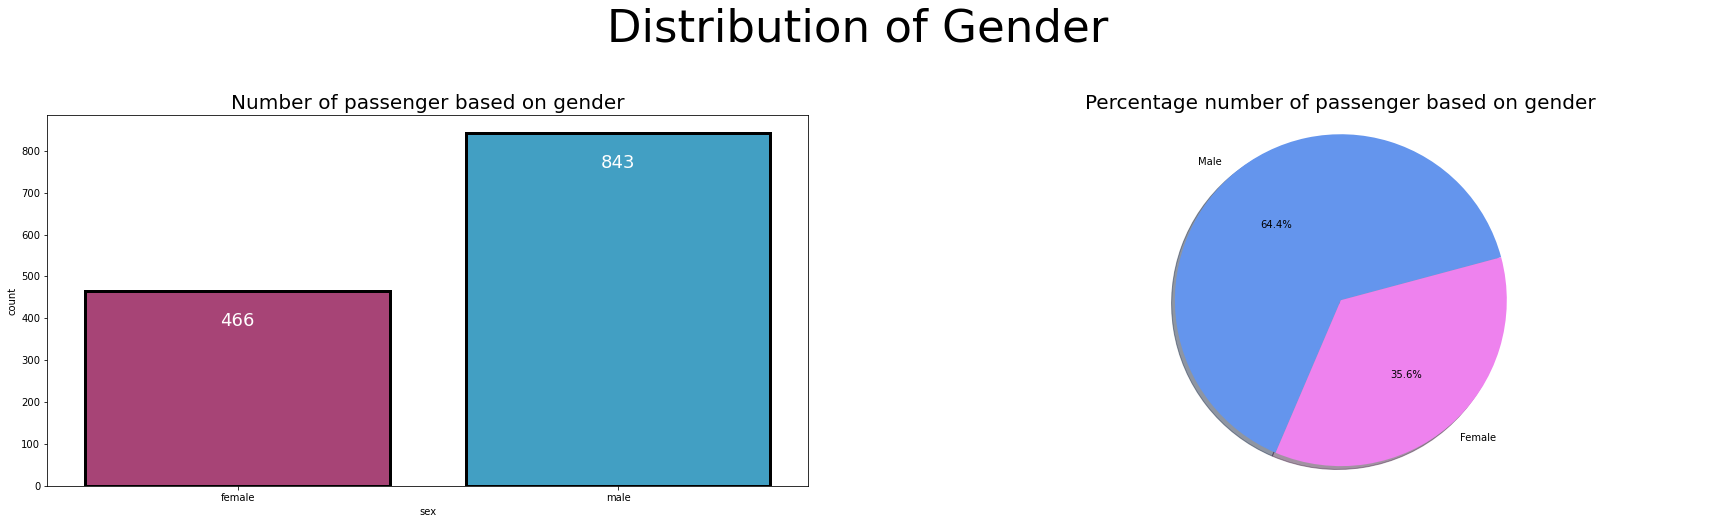

In [35]:
plt.figure(figsize=(30,15))
plt.suptitle('Distribution of Gender',size=45)
plt.subplot2grid((2,2),(0,0))
ax=sns.countplot(data=df,x='sex',palette= ["#B73377","#2DA9D9"],edgecolor='black',linewidth=3)
ax.set_title('Number of passenger based on gender', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.subplot2grid((2,2),(0,1))
plt.title('Percentage number of passenger based on gender',size=20)
x=df["sex"].value_counts()
mylabel=["Male","Female"]
colors=['cornflowerblue','violet']
plt.pie(x,labels=mylabel,autopct="%1.1f%%",startangle=15,shadow=True,colors=colors)
plt.axis("equal")
plt.show()


### **5.1.1**  The distribution shows almost twice as many men as women, but does the number affect the death rate?

In [36]:
rgender=df.groupby(['sex','survived']).count()['name'].reset_index()
rgender

,sex,survived,name
0,female,0.0,127
1,female,1.0,339
2,male,0.0,682
3,male,1.0,161


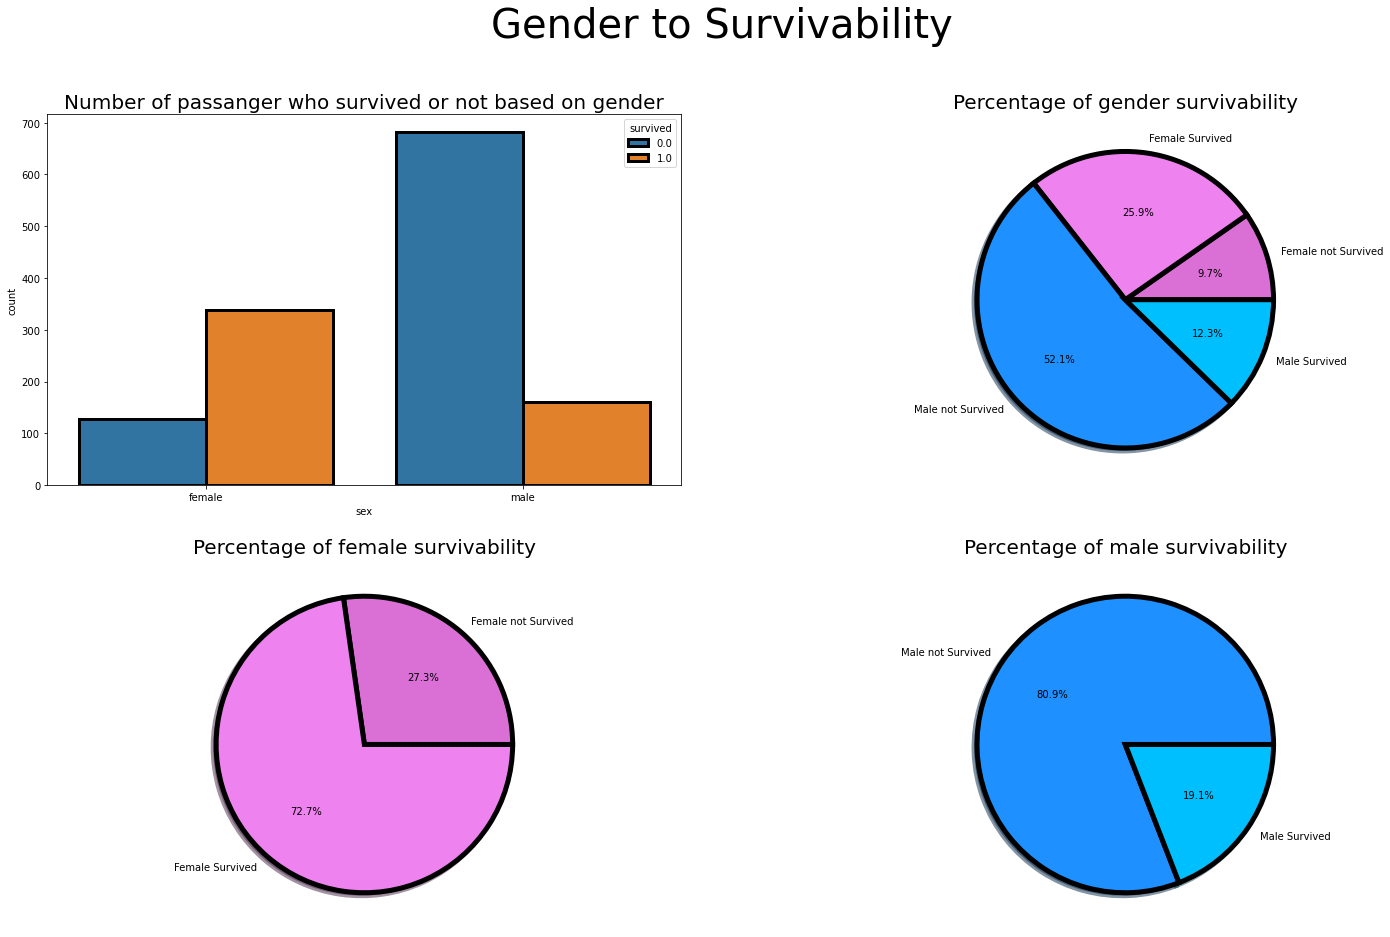

In [37]:
plt.figure(figsize=(25,15))
plt.suptitle('Gender to Survivability',size=40)
plt.subplot2grid((2,2),(0,0))
plt.title('Number of passanger who survived or not based on gender',size=20)
sns.countplot(data=df,x='sex',hue='survived',edgecolor='black',linewidth=3)
plt.subplot2grid((2,2),(0,1))
plt.title('Percentage of gender survivability',size=20)
plt.pie(
    rgender['name'],
    labels=['Female not Survived','Female Survived','Male not Survived','Male Survived'], # memberi label nama untuk tiap2 bagian
    colors=['orchid','violet','dodgerblue','deepskyblue'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)

plt.subplot2grid((2,2),(1,0))
plt.title('Percentage of female survivability',size=20)
plt.pie(
    rgender['name'][rgender['sex']=='female'],
    labels=['Female not Survived','Female Survived'],
    colors=['orchid','violet'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.subplot2grid((2,2), (1, 1))
plt.title('Percentage of male survivability',size=20)
plt.pie(
    rgender['name'][rgender['sex']=='male'],
    labels=['Male not Survived','Male Survived'], 
    colors=['dodgerblue','deepskyblue'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.show()


### **5.1.2**  The pie chart above shows that men have a significantly higher percentage of deaths than women

### **5.1.3** To ensure the analysis of the data above, let's check the distribution of the median with the proportion z test
* H0: Female's survivability median = Male's survivability median
* H1: Female's survivability median higher than Male's survivability median

In [38]:
df_count = pd.crosstab(df["sex"],df["survived"])
df_count

survived,0.0,1.0
sex,,
female,127,339
male,682,161


In [39]:
from statsmodels.stats.proportion import proportions_ztest
stats, pval = proportions_ztest(df_count[1],df_count.sum(axis=1),alternative='larger')
print(pval)
if pval <= 0.05:
    print("Female's survivability median higher than Male's survivability median")
else:
    print("Female's survivability median = Male's survivability median")

7.35726550846066e-82
Female's survivability median higher than Male's survivability median


![alt text](https://cdn.idntimes.com/content-images/post/20211108/rice-aa67e5c3ad8c3329d76a6c1ba537765b.jpg)![alt text](https://i.pinimg.com/564x/2b/37/e8/2b37e865d73826d0d9bc7567a3624845--boater-titanic.jpg)

### **Female** has the Higher Percentage of Survived is because :
#### from 1852, whereby the lives of **women and children** were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited. 

## **5.2** Which class has the higher mortality rate? And why?

In [40]:
rpclass=df.groupby(['pclass','survived']).count()['name'].reset_index()
# rpclass

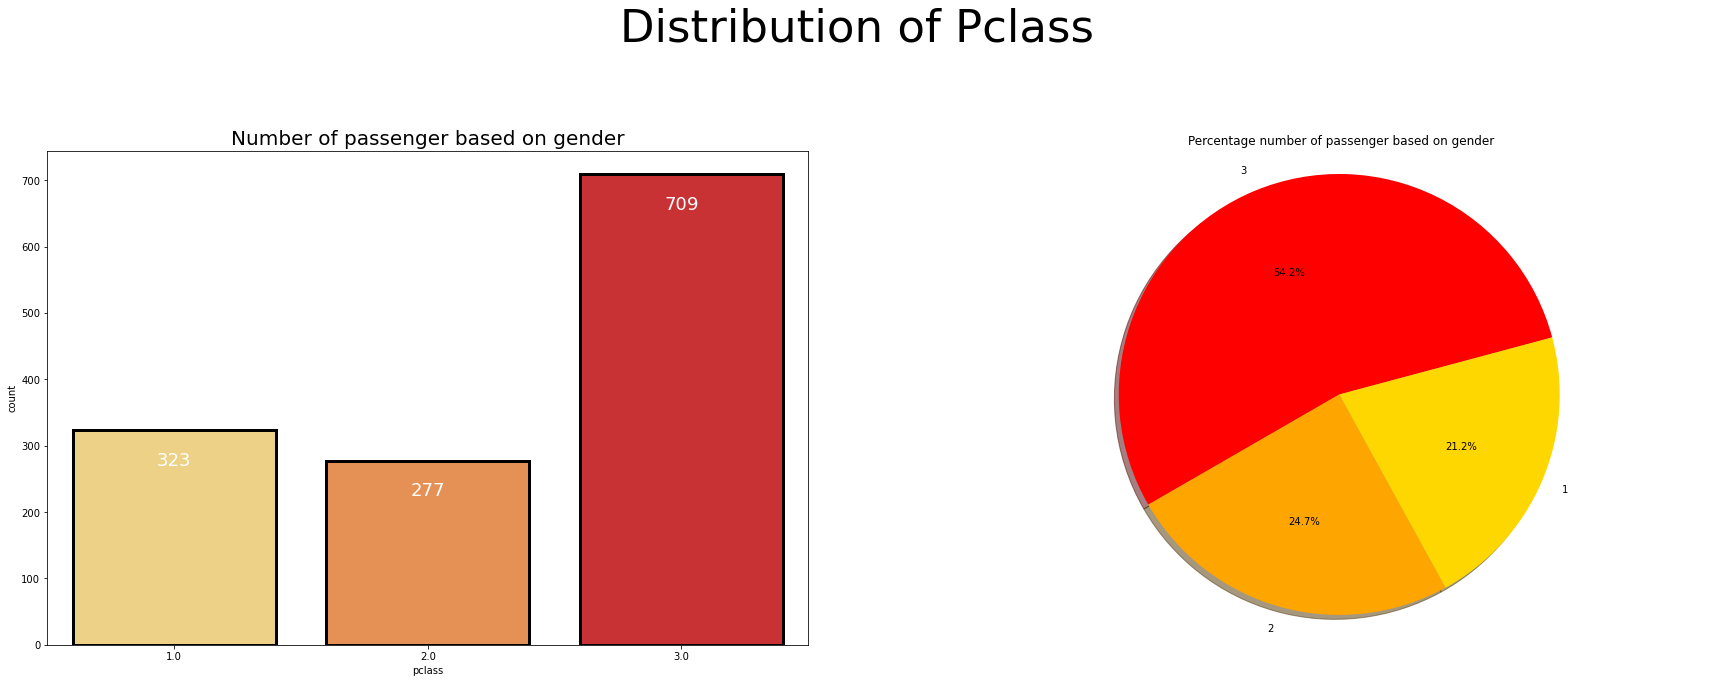

In [41]:
plt.figure(figsize=(30,20))
plt.suptitle('Distribution of Pclass',size=45)
plt.subplot2grid((2,2),(0,0))
ax=sns.countplot(data=df,x='pclass',palette= 'YlOrRd',edgecolor='black',linewidth=3)
ax.set_title('Number of passenger based on gender', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.subplot2grid((2,2),(0,1))
plt.title('Percentage number of passenger based on gender')
x=df["pclass"].value_counts()
mylabel=["3","2","1"]
colors=['red','orange','gold']
plt.pie(x,labels=mylabel,autopct="%1.1f%%",startangle=15,shadow=True,colors=colors)
plt.axis("equal")
plt.show()


### **5.2.1** The distribution shows there is not much difference between the number of passengers in class 1 and class 2, but class 3 has the most passengers, which is more than twice the class 2. But does the number affect the death rate?

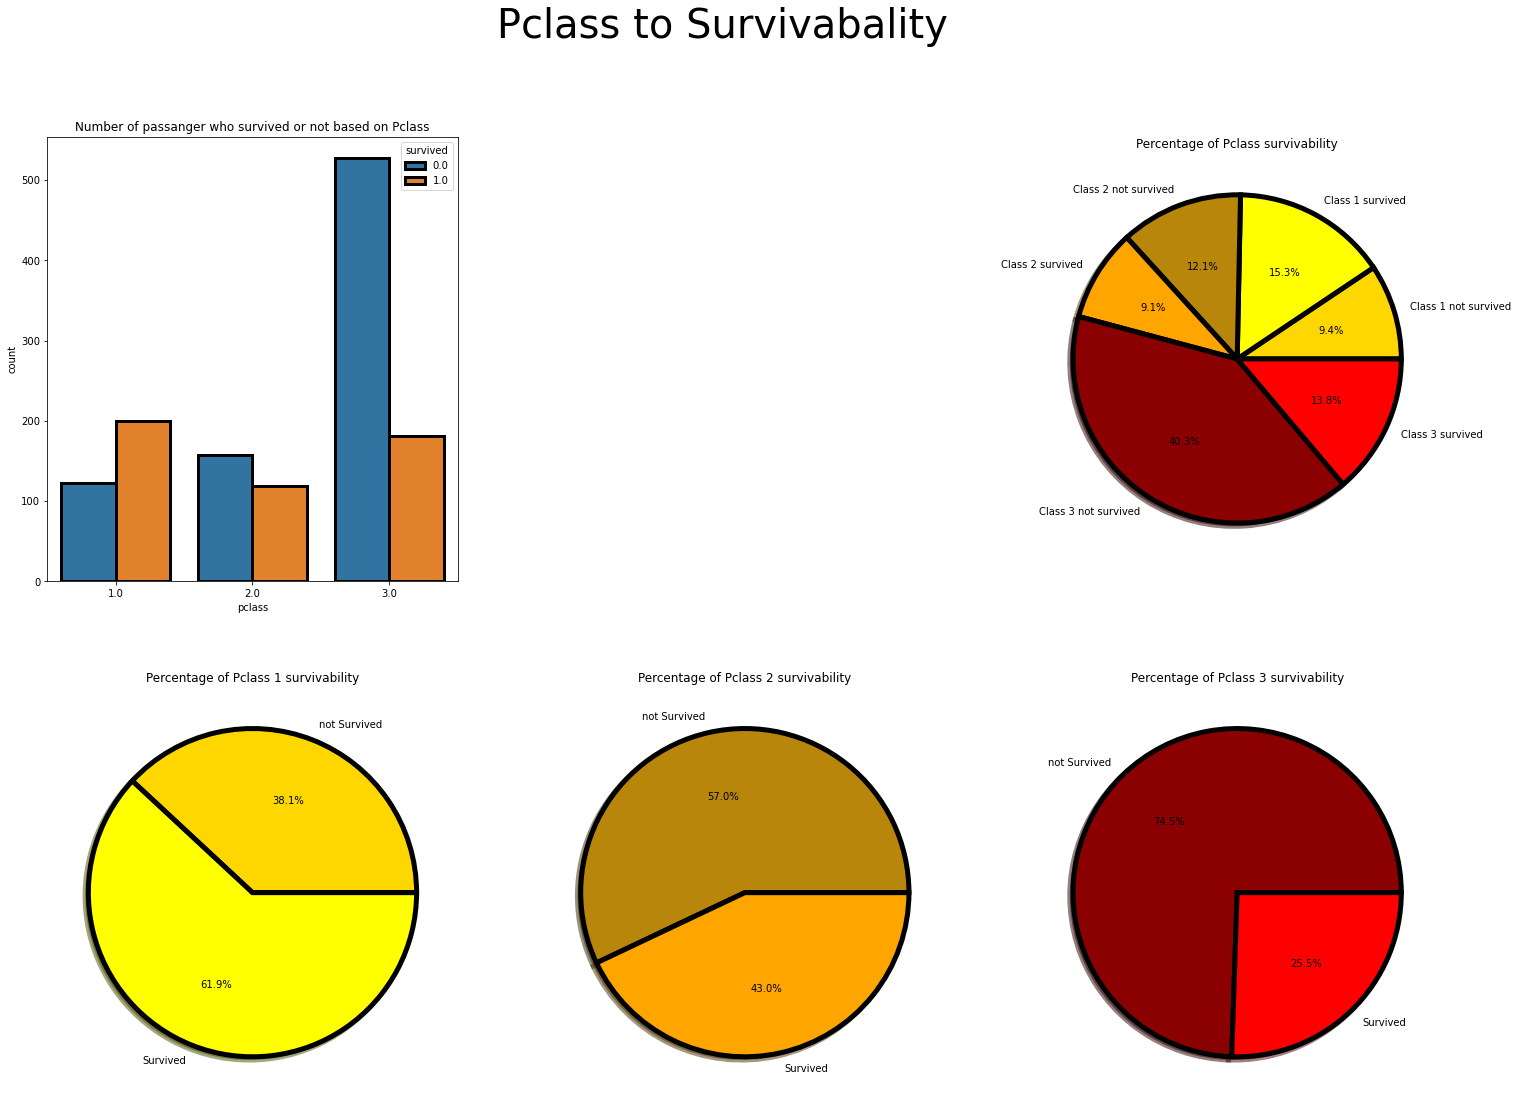

In [42]:
plt.figure(figsize=(25,18))
plt.suptitle('Pclass to Survivabality',size=40)
plt.subplot2grid((2,3),(0,0))
plt.title('Number of passanger who survived or not based on Pclass')
sns.countplot(data=df,x='pclass',hue='survived',edgecolor='black',linewidth=3)
plt.subplot2grid((2,3),(0,2))
plt.title('Percentage of Pclass survivability')
plt.pie(
    rpclass['name'],
    labels=['Class 1 not survived','Class 1 survived','Class 2 not survived','Class 2 survived','Class 3 not survived','Class 3 survived',], # memberi label nama untuk tiap2 bagian
    colors=['gold','yellow','darkgoldenrod','orange','darkred','red'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.subplot2grid((2,3),(1,0))
plt.title('Percentage of Pclass 1 survivability')
plt.pie(
    rpclass['name'][rpclass['pclass']==1],
    labels=['not Survived','Survived'],
    colors=['gold','yellow'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.subplot2grid((2,3),(1,1))
plt.title('Percentage of Pclass 2 survivability')
plt.pie(
    rpclass['name'][rpclass['pclass']==2],
    labels=['not Survived','Survived'],
    colors=['darkgoldenrod','orange'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.subplot2grid((2,3),(1,2))
plt.title('Percentage of Pclass 3 survivability')
plt.pie(
    rpclass['name'][rpclass['pclass']==3],
    labels=['not Survived','Survived'],
    colors=['darkred','red'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)


plt.show()

### **5.1.2**  The bar chart and pie charts above shows that Passanger in class 3 had the highest mortality rate than grades 1 and 2  
### But it turns out that there is a pattern where the higher the class, the lower the death rate. Why? Lets take a look at the pictures below


### **Conclusion**

![alt text](https://www.encyclopedia-titanica.org/files/1/figure-one-side-view.gif)![alt text](https://qph.fs.quoracdn.net/main-qimg-b04c75af38ff2cfa2df87906b1ab6e7c)

### Pclass 1 have the highest surivived percentage than any other class is because
  * **A Deck & B Deck**, also called the Promenade Deck placed near the **Boat Deck** where the lifeboats were housed
  * **A Deck**, also called the Promenade Deck, extended along the entire 546 feet (166 m) length of the superstructure. It was reserved exclusively for **First Class passengers** and contained First Class cabins, the First Class lounge, smoke room, reading and writing rooms and Palm Court
  * **B Deck**, the Bridge Deck, was the top weight-bearing deck and the uppermost level of the hull. More **First Class passenger** accommodations were located here with six palatial staterooms (cabins) featuring their own private promenades.
  * **Pclass 1 / First class** passengers are the No.1 lifeboat's Priority

### Pclass 2&3 have the 2nd and the least surivived percentage is because
  * **F Deck, the Middle Deck**, was the last complete deck and mainly accommodated Second and Third Class passengers and several departments of the crew. The Third Class dining saloon was located here, as were the swimming pool, Turkish bath and kennels.

## **5.3** Does traveling alone have a higher mortality rate? And why?

In [43]:
rstatus=df.groupby(['status','survived']).count()['name'].reset_index()
rstatus

,status,survived,name
0,alone,0.0,551
1,alone,1.0,239
2,not alone,0.0,258
3,not alone,1.0,261


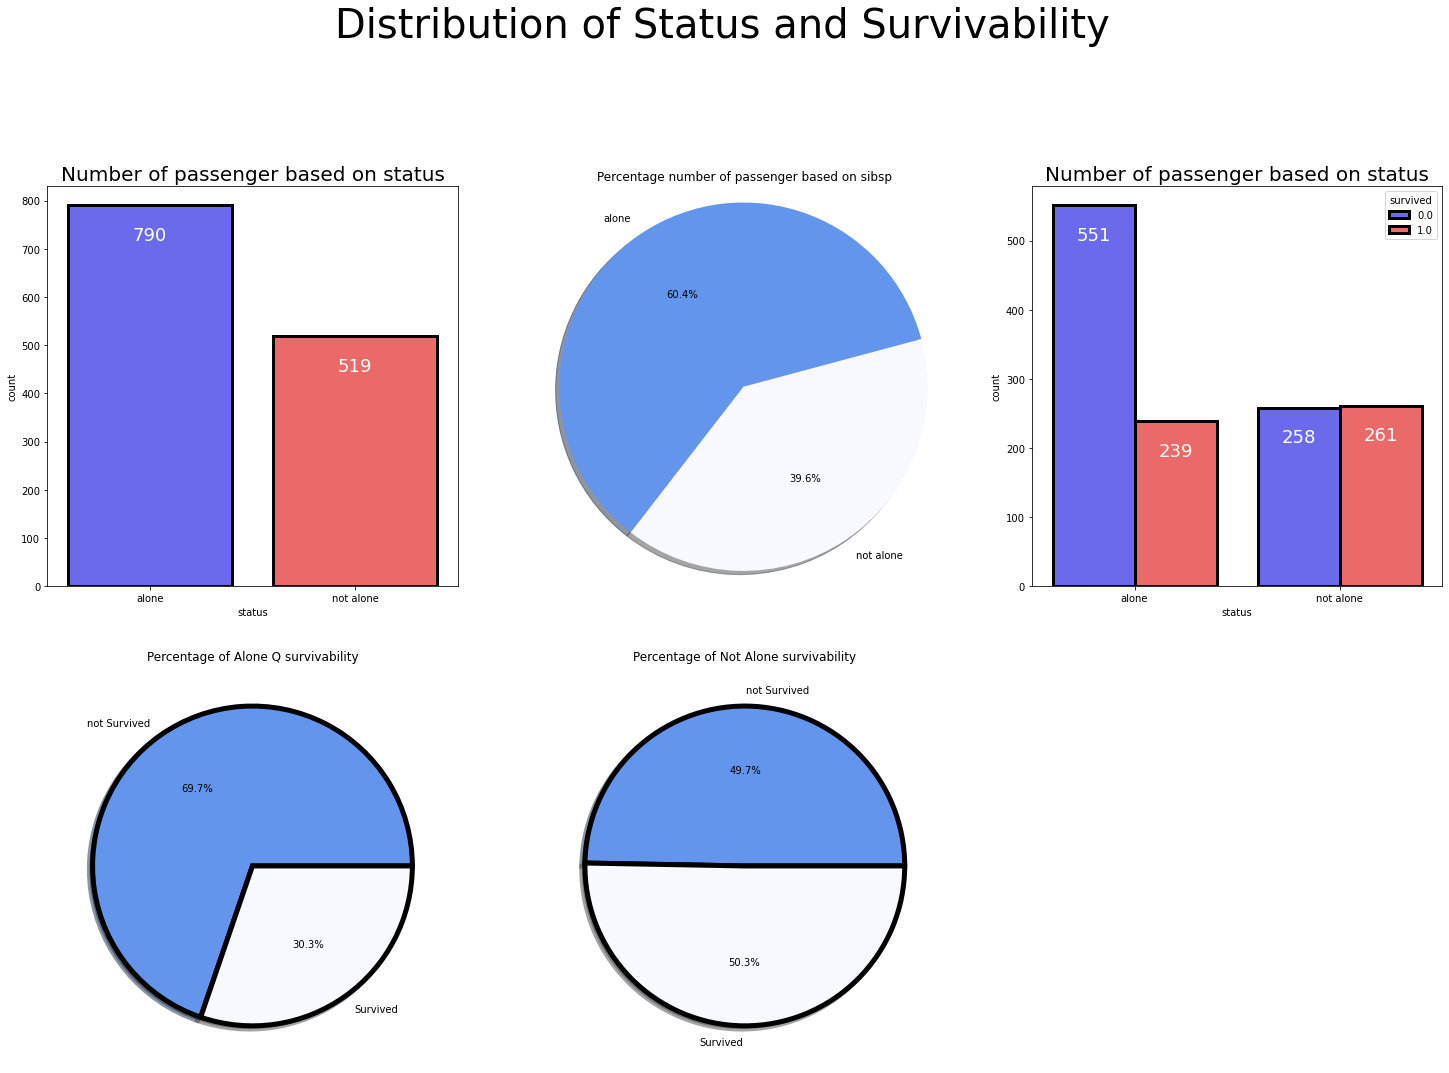

In [44]:
plt.figure(figsize=(25,25))
plt.suptitle('Distribution of Status and Survivability',size=40)
plt.subplot2grid((3,3),(0,0))
ax=sns.countplot(data=df,x='status',palette= 'seismic',edgecolor='black',linewidth=3)
ax.set_title('Number of passenger based on status', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.subplot2grid((3,3),(0,1))
plt.title('Percentage number of passenger based on sibsp')
x=df["status"].value_counts()
mylabel=df['status'].unique()
colors=['cornflowerblue' ,'ghostwhite' ,'lavender', 'midnightblue', 'navy' ,'darkblue', 'mediumblue', 'darkslateblue'
]
plt.pie(x,labels=mylabel,autopct="%1.1f%%",startangle=15,shadow=True,colors=colors)
plt.axis("equal")
plt.subplot2grid((3,3),(0,2))
ax=sns.countplot(data=df,x='status',hue='survived',palette= 'seismic',edgecolor='black',linewidth=3)
ax.set_title('Number of passenger based on status', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

plt.subplot2grid((3,3),(1,0))
plt.title('Percentage of Alone Q survivability')
plt.pie(
    rstatus['name'][rstatus['status']=='alone'],
    labels=['not Survived','Survived'],
    colors=['cornflowerblue' ,'ghostwhite'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.subplot2grid((3,3),(1,1))
plt.title('Percentage of Not Alone survivability')
plt.pie(
    rstatus['name'][rstatus['status']=='not alone'],
    labels=['not Survived','Survived'],
    colors=['cornflowerblue' ,'ghostwhite'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.show()

### **5.3.1**  the Pie chart shows that the death rate of people traveling alone is higher than that of people traveling with someone
### What caused it? let's see the prediction of the cause why it can happen

![alt text](https://media.nomadicmatt.com/alone001.jpg)![alt text](https://lifebeyondnumbers.com/wp-content/uploads/2019/06/school-friends-traveling-together.png)

### **Conclusion**
#### Passenger who travel **alone** have lower percentage of survivability is because
  * No one (Who is close to you) might help you / you might helping your close one

#### Passenger who travel **not alone** have higher percentage of survivability is because
  * Someone who is close to you might help you / Member of family which contains **Women** and **Child** (who is the priority to be saved)

## **5.4** Does the origin of departure have any effect on mortality rates? And why?
Notes=  
C = Cherbourg  
Q = Queenstown  
S = Southampton

In [45]:
rembarked=df.groupby(['embarked','survived']).count()['name'].reset_index()
rembarked

,embarked,survived,name
0,C,0.0,120
1,C,1.0,150
2,Q,0.0,79
3,Q,1.0,44
4,S,0.0,610
5,S,1.0,304


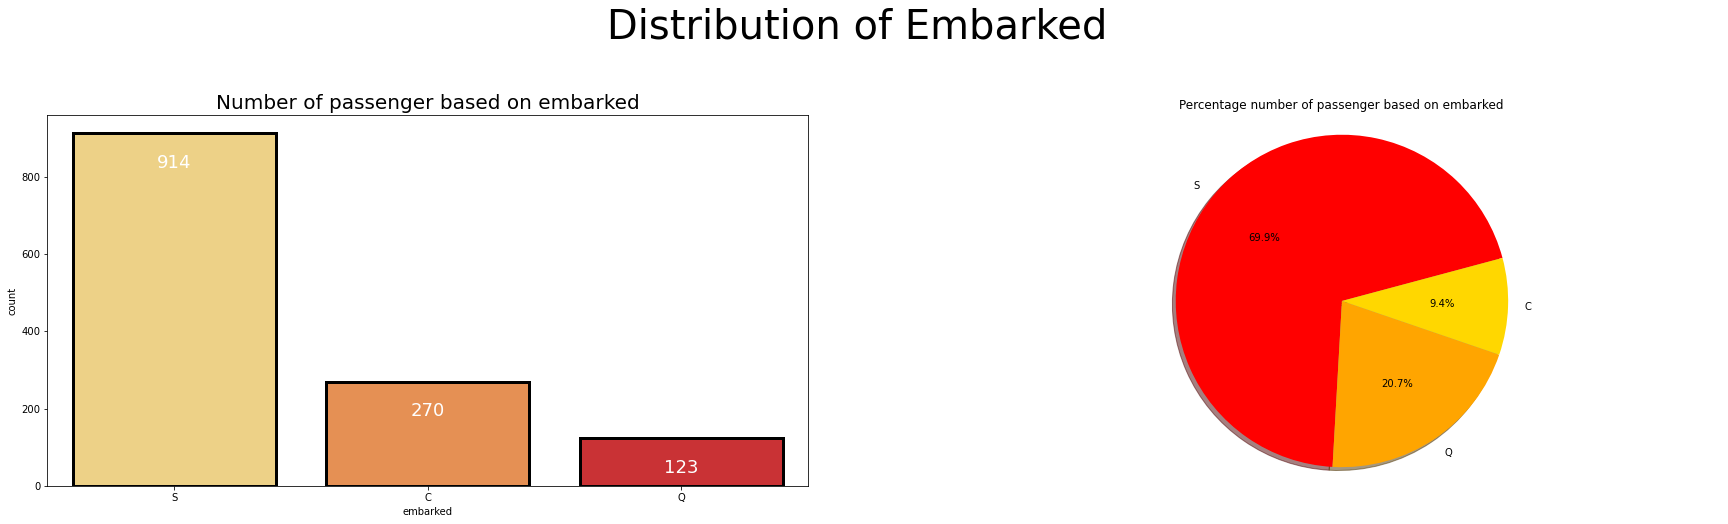

In [46]:
plt.figure(figsize=(30,15))
plt.suptitle('Distribution of Embarked',size=40)
plt.subplot2grid((2,2),(0,0))
ax=sns.countplot(data=df,x='embarked',palette= 'YlOrRd',edgecolor='black',linewidth=3)
ax.set_title('Number of passenger based on embarked', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.subplot2grid((2,2),(0,1))
plt.title('Percentage number of passenger based on embarked')
x=df["embarked"].value_counts()
mylabel=["S","Q","C"]
colors=['red','orange','gold']
plt.pie(x,labels=mylabel,autopct="%1.1f%%",startangle=15,shadow=True,colors=colors)
plt.axis("equal")
plt.show()


### **5.4.1** The distribution shows there is not much difference between the number of passengers from Chesbourg and Queenstown, but passengers from Southampton have the most passengers, which is more than three times than passengers from Chesbourg. But does that number affect the death rate?

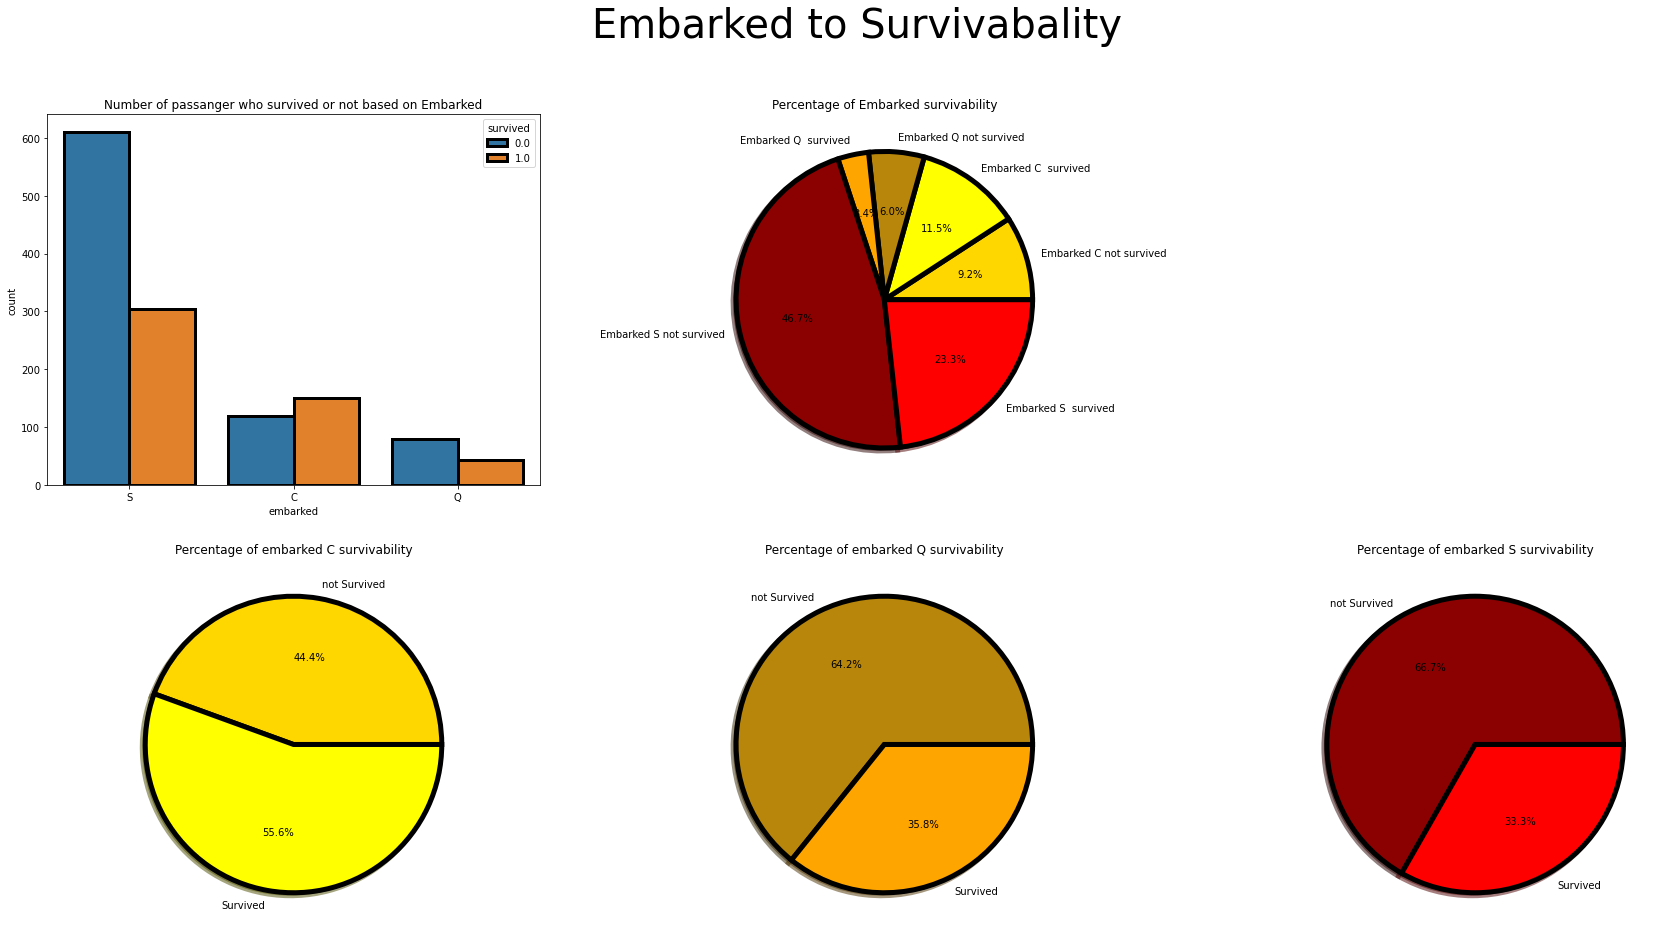

In [47]:
plt.figure(figsize=(30,15))
plt.suptitle('Embarked to Survivabality',size=40)
plt.subplot2grid((2,3),(0,0))
plt.title('Number of passanger who survived or not based on Embarked')
sns.countplot(data=df,x='embarked',hue='survived',edgecolor='black',linewidth=3)
plt.subplot2grid((2,3),(0,1))
plt.title('Percentage of Embarked survivability')
plt.pie(
    rembarked['name'],
    labels=['Embarked C not survived','Embarked C  survived','Embarked Q not survived','Embarked Q  survived','Embarked S not survived','Embarked S  survived',], # memberi label nama untuk tiap2 bagian
    colors=['gold','yellow','darkgoldenrod','orange','darkred','red'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.subplot2grid((2,3),(1,0))
plt.title('Percentage of embarked C survivability')
plt.pie(
    rembarked['name'][rembarked['embarked']=='C'],
    labels=['not Survived','Survived'],
    colors=['gold','yellow'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.subplot2grid((2,3),(1,1))
plt.title('Percentage of embarked Q survivability')
plt.pie(
    rembarked['name'][rembarked['embarked']=='Q'],
    labels=['not Survived','Survived'],
    colors=['darkgoldenrod','orange'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)
plt.subplot2grid((2,3),(1,2))
plt.title('Percentage of embarked S survivability')
plt.pie(
    rembarked['name'][rembarked['embarked']=='S'],
    labels=['not Survived','Survived'],
    colors=['darkred','red'],
    wedgeprops={"edgecolor":"k",'linewidth': 5, 'linestyle': '-', 'antialiased': True},
    autopct='%1.1f%%',
    shadow=True
)


plt.show()

### **5.4.2**  Quite tricky if we take a conclusion from the visualization above. Because of that, let's make sure by testing the relationship from each location using Chi Contingency.

#### Effects of Embarked town to survivability.
* H0: Someone's Port of Embarkation affects their survivability
* H1: Someone's Port of Embarkation did not affects their survivability

In [48]:
from scipy.stats import chi2_contingency
stats, pval, dof, expected = chi2_contingency(pd.crosstab(df["embarked"],df["survived"]))
print(pval)
if pval <= 0.05:
    print("Someone's Port of Embarkation did not affects their survivability")
else:
    print("Someone's Port of Embarkation affects their survivability")

2.4718809874825634e-10
Someone's Port of Embarkation did not affects their survivability


### It shows that **Someone's Port of Embarkation did not affects their survivability**

## **5.5** Does age affect the mortality rate? And why?

<AxesSubplot:title={'center':'Age to Surivivability'}, xlabel='age', ylabel='Count'>

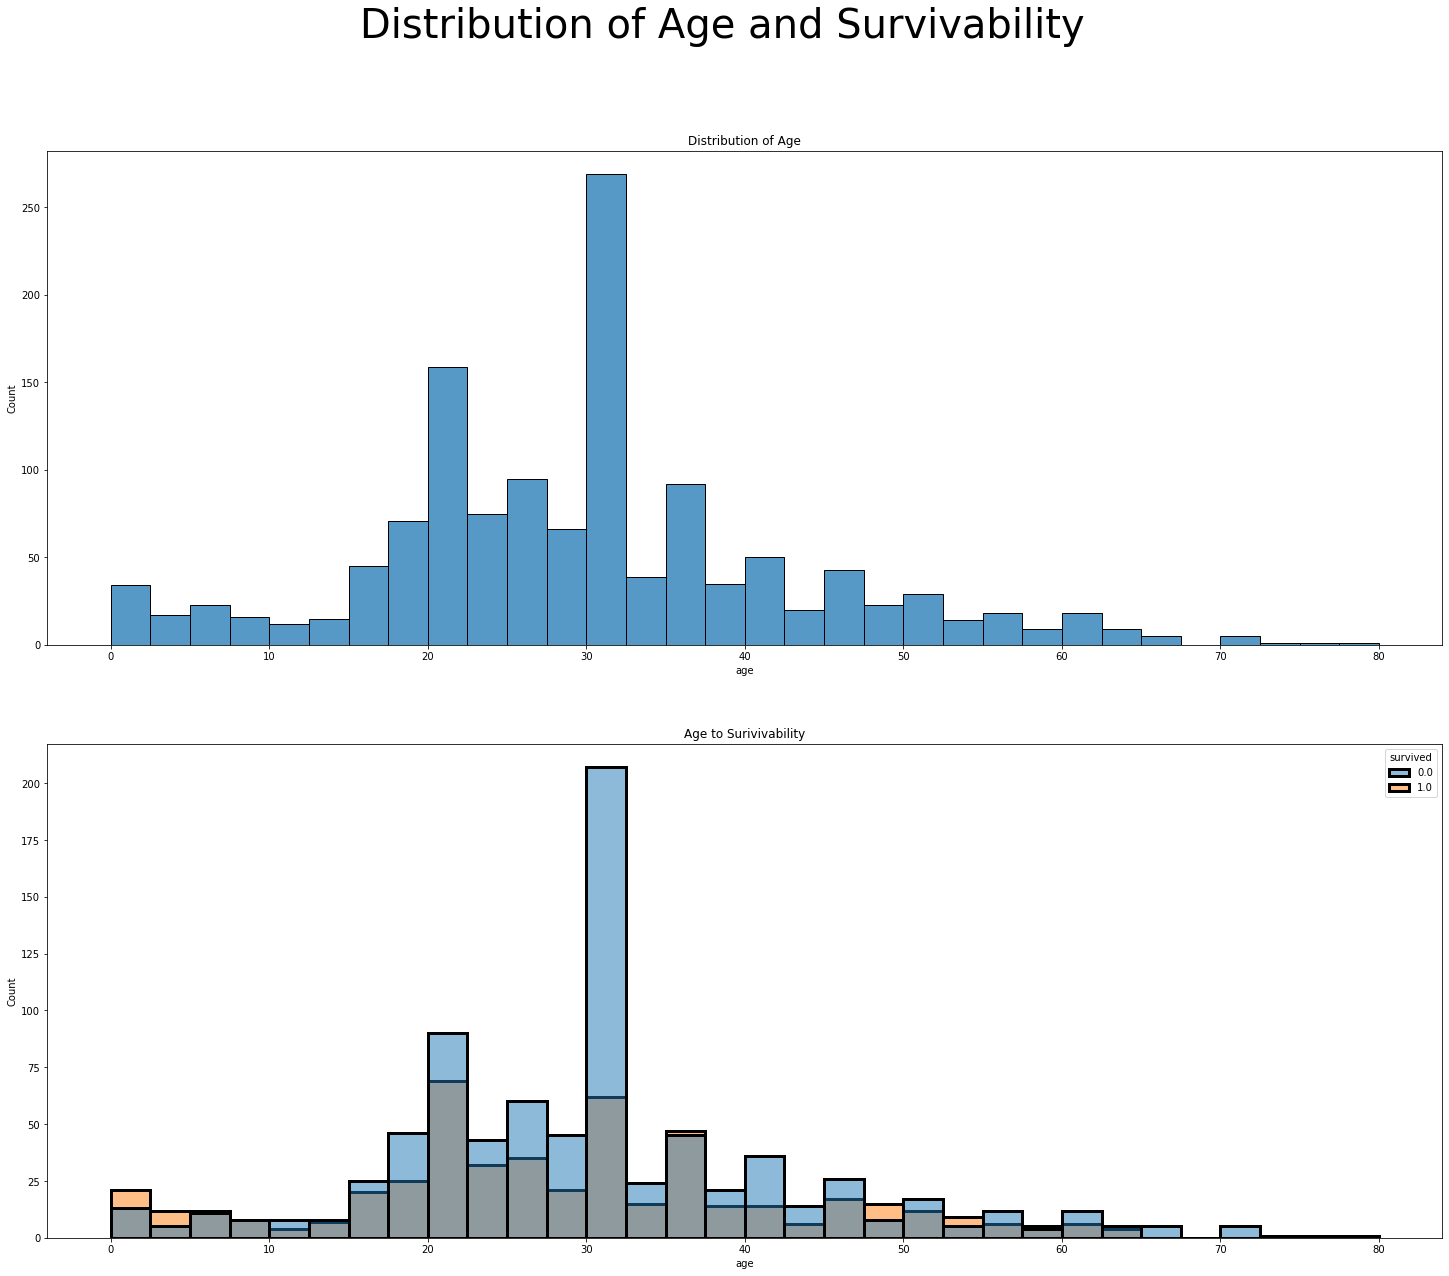

In [49]:
plt.figure(figsize=(25,20))
plt.suptitle('Distribution of Age and Survivability',size=40)
plt.subplot(211)
plt.title('Distribution of Age')
sns.histplot(data=df,x='age')
plt.subplot(212)
plt.title('Age to Surivivability')
sns.histplot(data=df,x='age',hue='survived',edgecolor='black',linewidth=3)

### Compare Passenger's age that Survived and Not Survived
* H0: Passenger's Median age that Survived  = Passenger's Median age that Not Survived .
* H1: Passenger's Median age that Survived  < Passenger's Median age that Not Survived .

In [50]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(df[df["survived"]==0]["age"],
             df[df["survived"]==1]["age"],
             alternative="greater")
print(pval)
if pval <= 0.05:
    print("Passenger's Median age that Survived  < Passenger's Median age that Not Survived ")
else:
    print("Passenger's Median age that Survived  = Passenger's Median age that Not Survived")

0.012055177318622419
Passenger's Median age that Survived  < Passenger's Median age that Not Survived 


In [51]:
df.groupby('survived')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0.0,809.0,30.530284,12.459514,0.0,22.0,32.0,36.0,74.0
1.0,500.0,28.776000,14.230208,0.0,21.0,28.0,37.0,80.0


### **Conclusion**
* Table Describe and mannwhitneyu test of Survived and Age shows:
  * Mean and Median shows any gap between, that means Passenger's age that Survived was smaller than Passenger's age that Not Survived
  * Mannwhitneyu test shows Passenger's age that Survived was smaller than Passenger's age that Not Survived

## **5.6** Does the title they have affect the death rate? And why?


In [52]:
df['title'].value_counts(normalize = True) * 100

 Mr              57.830405
 Miss            19.862490
 Mrs             15.049656
 Master           4.660046
 Dr               0.611154
 Rev              0.611154
 Col              0.305577
 Mlle             0.152788
 Ms               0.152788
 Major            0.152788
 Dona             0.076394
 the Countess     0.076394
 Mme              0.076394
 Jonkheer         0.076394
 Capt             0.076394
 Don              0.076394
 Lady             0.076394
 Sir              0.076394
Name: title, dtype: float64

### **5.6.1** Because the number of passengers who have the title is below 1 percent, I am gonna set ' Rev', ' Dr', ' Col', ' Ms', ' Mlle', ' Major', ' Countess', ' Capt', ' Dona', ' Jonkheer', ' Lady', ' Sir', ' Mme', ' Don',' the Countess'  **To 'Other'**  

In [53]:
df['title'] = df['title'].replace([' Rev', ' Dr', ' Col', ' Ms', ' Mlle', ' Major', ' Countess', 
                                       ' Capt', ' Dona', ' Jonkheer', ' Lady', ' Sir', ' Mme', ' Don',' the Countess'], 'Other')

### **5.6.2** And now the Titles that I am gonna analyze is Miss, Master, Mr, Mrs, and Other

In [54]:
df['title'].unique()

array([' Miss', ' Master', ' Mr', ' Mrs', 'Other'], dtype=object)

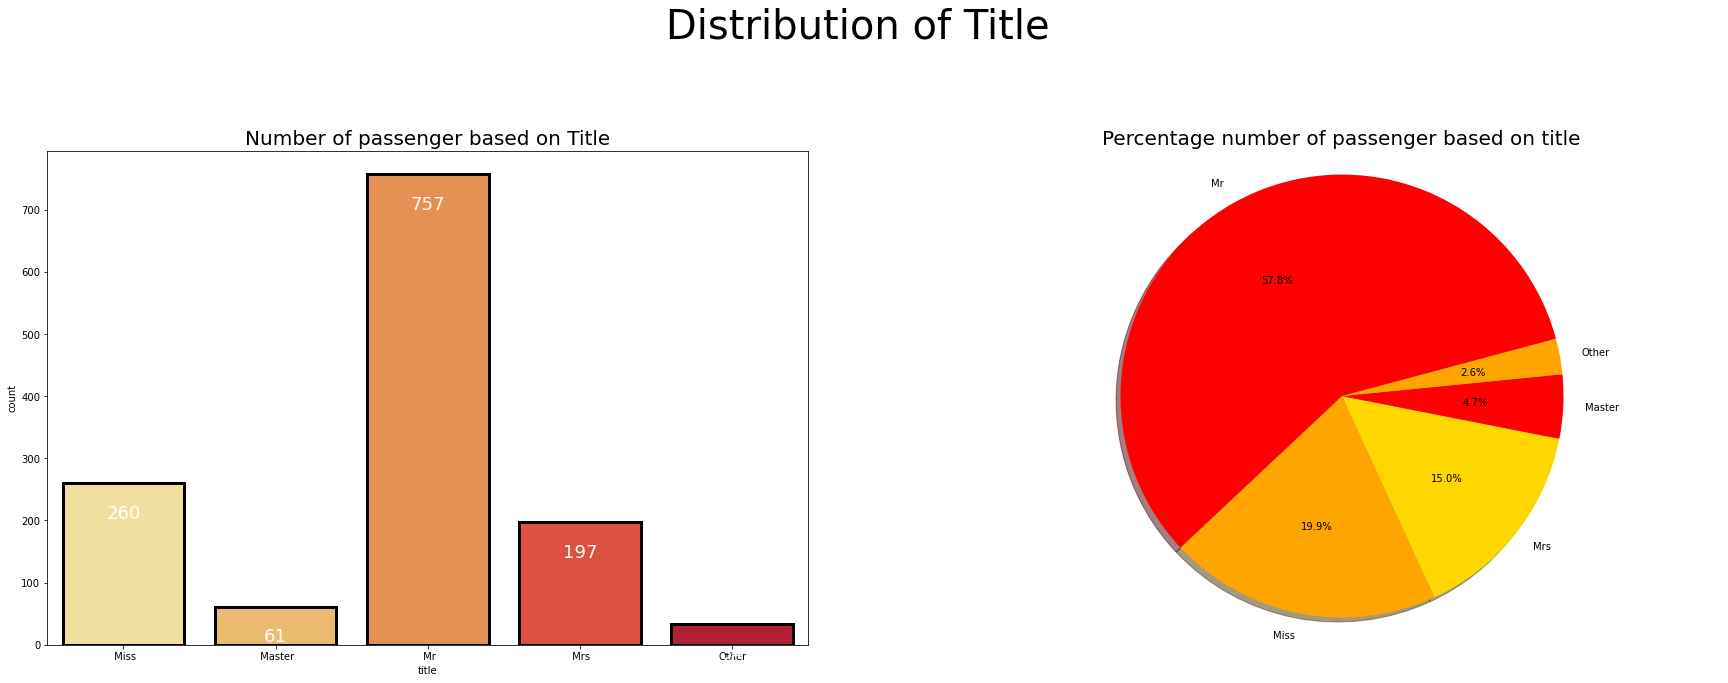

In [55]:
plt.figure(figsize=(30,20))
plt.suptitle('Distribution of Title',size=40)
plt.subplot2grid((2,2),(0,0))
ax=sns.countplot(data=df,x='title',palette= 'YlOrRd',edgecolor='black',linewidth=3)
ax.set_title('Number of passenger based on Title', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.subplot2grid((2,2),(0,1))
plt.title('Percentage number of passenger based on title',size=20)
x=df["title"].value_counts()
mylabel=["Mr","Miss","Mrs","Master","Other"]
colors=['red','orange','gold']
plt.pie(x,labels=mylabel,autopct="%1.1f%%",startangle=15,shadow=True,colors=colors)
plt.axis("equal")
plt.show()


### **5.6.3**  The distribution shows that most of the passangers have 'Mr' as their title, but does the Title affect the death rate?

<AxesSubplot:xlabel='title', ylabel='count'>

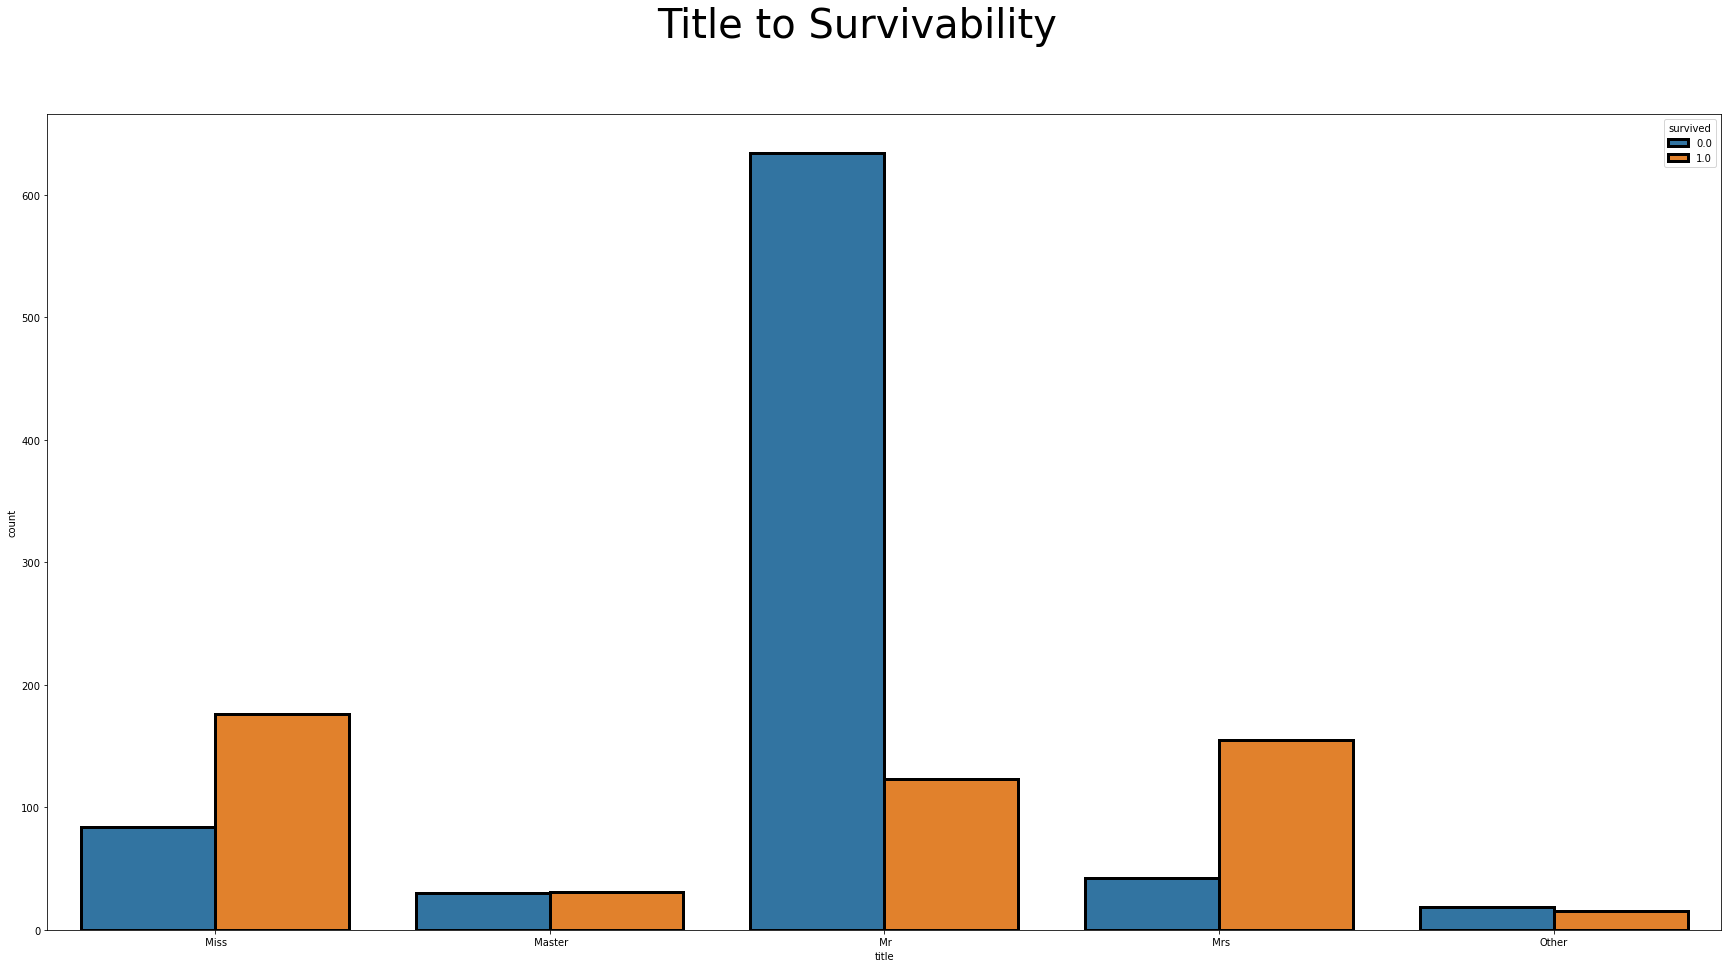

In [56]:
plt.figure(figsize=(30,15))
plt.suptitle('Title to Survivability',size=40)
sns.countplot(data=df,x='title',hue='survived',edgecolor='black',linewidth=3)

### **5.6.3** Quite tricky if we take a conclusion from the visualization above. Because of that, let's make sure by testing the relationship from each Titles using Chi Contingency.

#### Effects of Title to survivability.
* H0: Someone's Title affects their survivability
* H1: Someone's Title affects their survivability

In [57]:
from scipy.stats import chi2_contingency
stats, pval, dof, expected = chi2_contingency(pd.crosstab(df["title"],df["survived"]))
print(pval)
if pval <= 0.05:
    print("Someone's Title did not affects their survivability")
else:
    print("Someone's Title affects their survivability")

1.7418882880240496e-83
Someone's Title did not affects their survivability


### **Conclusion**`
**Title did not affects their survivability**


# After a reasonably long discussion above, now I can decide on the analysis above. To be sure, this conclusion is **not** one hundred percent correct because it is judged from data. I am not on the scene directly to know the actual conditions that occur. However, from this data, we can see that several factors play an essential role in a person's level of safety.

# To find out what factors, let's look at each question asked in the introduction.

## **1. Women or men, who have a higher mortality rate? And why?**
* **Female** has the Higher Percentage of Survived is because : from 1852, whereby the lives of **women and children** were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited. 

## 2. **Which class has the higher mortality rate? And why?**
* **Pclass 1** have the highest surivived percentage than any other class is because : Pclass 1 Passenger rooms and facilites located near the boat deck where the lifeboats were housed. Moreover, they have the priority to be saved than the other

## 3. **Does traveling alone have a higher mortality rate? And why?**
* Passenger who travel **alone** have lower percentage of survivability is because
  * No one (Who is close to you) might help you / you might helping your close one
* Passenger who travel **not alone** have higher percentage of survivability is because
  * Someone who is close to you might help you / Member of family which 
contains **Women** and **Child** (who is the priority to be saved)

## 4. **Does the origin of departure have any effect on mortality rates? And why?**
* Someone's Port of Embarkation did not affects their survivability

## 5. **Does age affect the mortality rate? And why?**
* Younger Passengers have higher survivability because they may have difficulty evacuating or accessing medical services to treat heat, dehydration, stokes or heart attacks

## 6. **Does the position you have affect the death rate? And why?**
* Someone's Title did not affects their survivability